## Global Model Agnostic AI Model Explanation: Permutation Feature Improtance


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


In [30]:
random_state = 42

# Load the Diabetes dataset
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = diabetes_data.target

#X = X.drop(['s1', 's6', 'age', 's2', 's6'], axis=1)

# binarizing the target
y = y>=np.median(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_state)

In [18]:
# Create and fit the Random Forest Regressor model
model = RandomForestClassifier(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [19]:
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

print(f'Classifier Accuracy: {acc}')

Classifier Accuracy: 0.7737556561085973


In [27]:
updated_feature_names = [name for name in diabetes_data.feature_names if name not in ['s1', 's6', 'age', 's2', 's6']]

# Calculate permutation importances
result = permutation_importance(model, X_test, y_test, n_repeats=25, random_state=random_state)

# Create a DataFrame to store the permutation importances with their corresponding feature names
importances_df = pd.DataFrame({'Feature': updated_feature_names, 'Importance': result.importances_mean,
                               'std': result.importances_std})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)

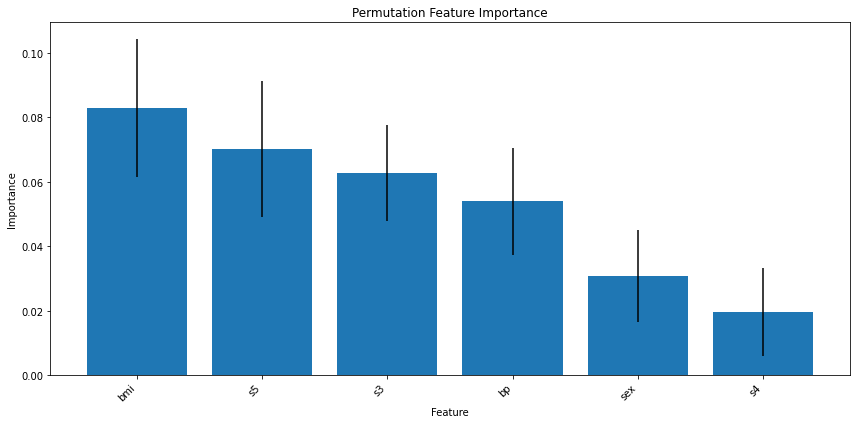

In [28]:

# Create the second subplot for Permutation Importances bar plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'], yerr=importances_df['std'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()


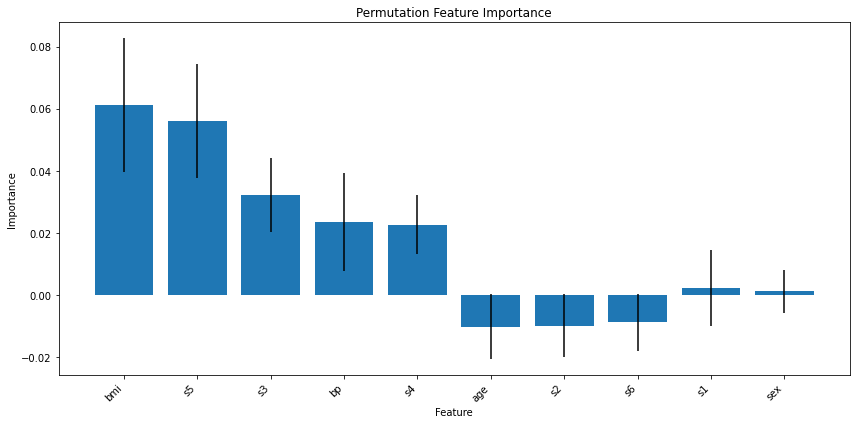

In [16]:
# Create the second subplot for Permutation Importances bar plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.bar(importances_df['Feature'], importances_df['Importance'], yerr=importances_df['std'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()


**Exercise 8:** Increase the size of the test set to 0.5, and repeat the analysis. Is the results different? Which one is more reliable?

The result is different in terms of accuracy socre and feature importance graph. Increase the test set size to 0.5, gives the model a larger, potentially more diverse set of data to assess feature importance. Which in this case lead to different result. 

As for which one is more reliable, I would say it depends on the domain problem at hand. I think, a smaller test set might not capture the variability in the data compared to a larger one, making the larger test set possibly more reliable. However, increasing the test set size reduces the training set size, which could affect the model's learning leading to underfiting.



**Exercise 9:** What is the interpretation of nagative importance? Why do they happen? Discuss.



The general interpretation of the feature importance is that the positive values the most important features, and negative ones matter least. This suggest that the model performe better when negative features are muted. It coulde be a good experiment to drop negative features to potentially imporve model performence. After dropping ['s1', 's6', 'age', 's2', 's6'] the model accuracy jumped to 0.77 from 0.73

**Exercise 10:** Try the same method with Gradient Boosting Classifier and explain the similarities and differences in results. 

Gradient Boosting Classifier Accuracy: 0.7194570135746606


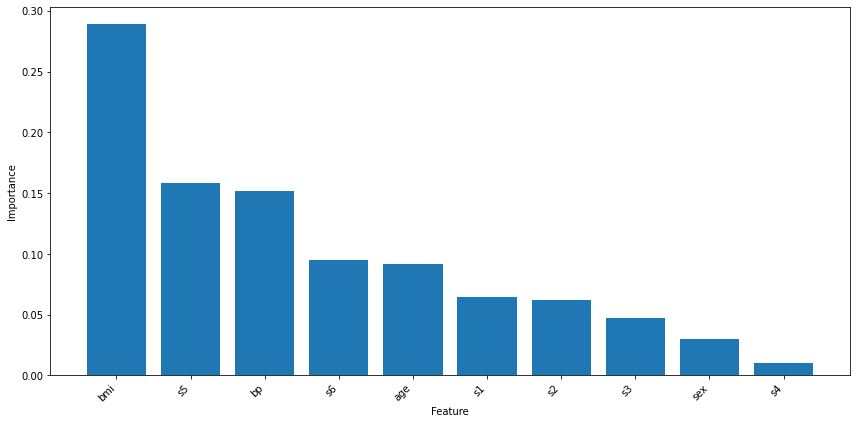

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100, random_state=random_state)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Classifier Accuracy: {acc_gb}')

importances_gb_df = pd.DataFrame({'Feature': diabetes_data.feature_names, 'Importance': model_gb.feature_importances_})

importances_gb_df = importances_gb_df.reindex(importances_gb_df['Importance'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(12, 6))
plt.bar(importances_gb_df['Feature'], importances_gb_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


Both methods identify the most and least important features, but not in the same order. Gradient Boosting didn't assign negative values to any feature. 
